<a href="https://colab.research.google.com/github/masahiro-t3927/KIKAGAKU/blob/master/Tensorflow__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving wine_class.csv to wine_class (6).csv
Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 1.1147 - accuracy: 0.4113 - val_loss: 6.6567 - val_accuracy: 0.2823
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9663 - accuracy: 0.5242 - val_loss: 4.8539 - val_accuracy: 0.4194
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.8845 - accuracy: 0.6371 - val_loss: 4.2069 - val_accuracy: 0.5968
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.7976 - accuracy: 0.6452 - val_loss: 3.8261 - val_accuracy: 0.5968
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.7996 - accuracy: 0.6774 - val_loss: 3.5485 - val_accuracy: 0.5887
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.8065 - val_loss: 3.2491 - val_accuracy: 0.5806
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.8548 - val_loss: 2.981

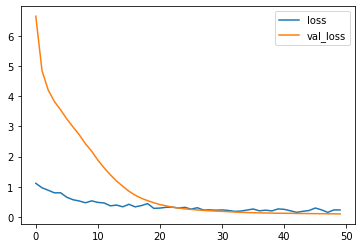

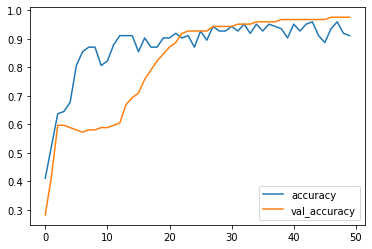

In [11]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

#乱数固定関数。colab上のCPUであれば再現性の確保が可能。
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

#ファイルアップデート
uploaded = files.upload()

#データ読み込み
df = pd.read_csv('wine_class.csv')
df.head(3) #先頭３件表示

#入力変数、目的変数に切り分け
t = df['Class'] #目的変数
x = df.drop('Class',axis=1) #入力変数、axis=1で列方向の指定。0の場合は行

# ユニークな値を確認
np.unique(t) #分類問題の目的変数は0から始まる必要あり。　今回の場合は1からスタートしていることがわかる。
# ラベルを 0 から始める
t = t.values - 1
x = x.values

# 学習データとテストデータの分割
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

# 32 bit にキャスト
x_train = np.array(x_train, np.float32)
x_test = np.array(x_train, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_train, np.int32)

# シードの固定
reset_seed(0)

###モデル構築
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#下の書き方でも良い
"""
model = models.Sequential()
model.add(layers.Dense(units=10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(units=3, activation='softmax'))
"""

###モデルのコンパイル(学習スタイルの定義)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', #2値化分類はBinaryCrossentropy
    metrics=['accuracy']
)

###モデルの学習
history = model.fit(
    x_train, t_train,
    batch_size=10,
    epochs=50,
    validation_data=(x_test, t_test)
)

#学習結果を視覚化
result = pd.DataFrame(history.history)
result.head()
result[['loss', 'val_loss']].plot(); #目的関数の値をプロット
result[['accuracy', 'val_accuracy']].plot(); #正解率をプロット

#ベストモデルの保存
model.save(filepath='wine_model.h5', save_format='h5')

###テストデータで性能確認
#モデル読み込み
load_model = tf.keras.models.load_model('wine_model.h5')
#データ準備
test_data = x_test[0]
test_data.shape
#モデルには[1,10]の形で入力する必要あり。（バッチサイズ,入力変数の形）で入力しなければならない
test_data = test_data.reshape(1,10)
#推論実施
result_class = load_model.predict(test_data)
result_class
print("Inference result = ", np.argmax(result_class) )#クラス分類のうち最も確率の高いクラスを抽出
#答え合わせ
print("Answer = ",t_test[0])